# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.


# **1. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**

In [2]:
# Load data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dari dataset
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


## **2.1 Exploratory Data Analysis (EDA)**

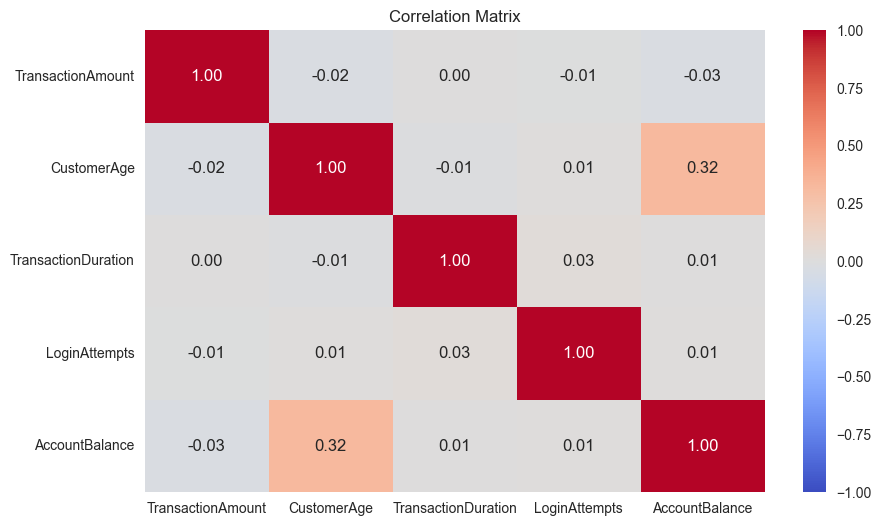

In [6]:
# Menampilkan korelasi antar fitur

# Memilih kolom numerik
numerical_cols = df.select_dtypes(include=['number']).columns

# Hitung matriks korelasi
correlation = df[numerical_cols].corr()

# Buat visualisasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation,
               annot=True,
               cmap='coolwarm',
               fmt=".2f",
               vmin=-1,
               vmax=1)
plt.title('Correlation Matrix')
plt.show()

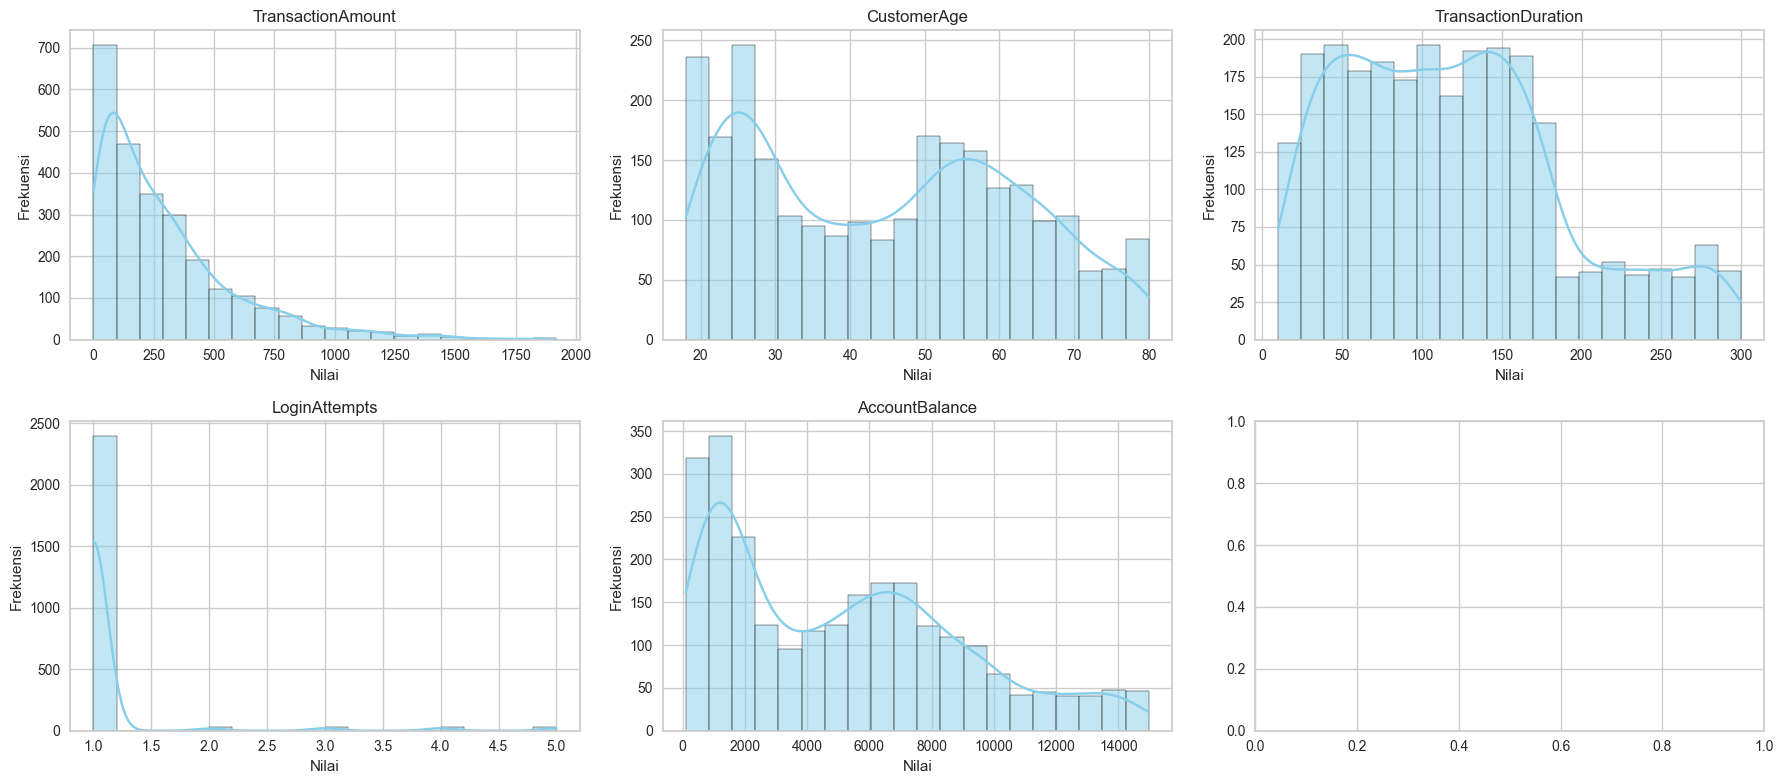

In [7]:
# Menampilkan histogram untuk semua kolom numerik

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

for i, column in enumerate(numerical_cols):

    # Tampilkan histogram dan pastikan plot ditempatkan di subplot (axes) yang benar
    sns.histplot(df[column], bins=20, kde=True, color='skyblue', ax=axes[i])

    # Atur judul dan label
    axes[i].set_title(column)
    axes[i].set_xlabel("Nilai")
    axes[i].set_ylabel("Frekuensi")

plt.tight_layout()
plt.show()

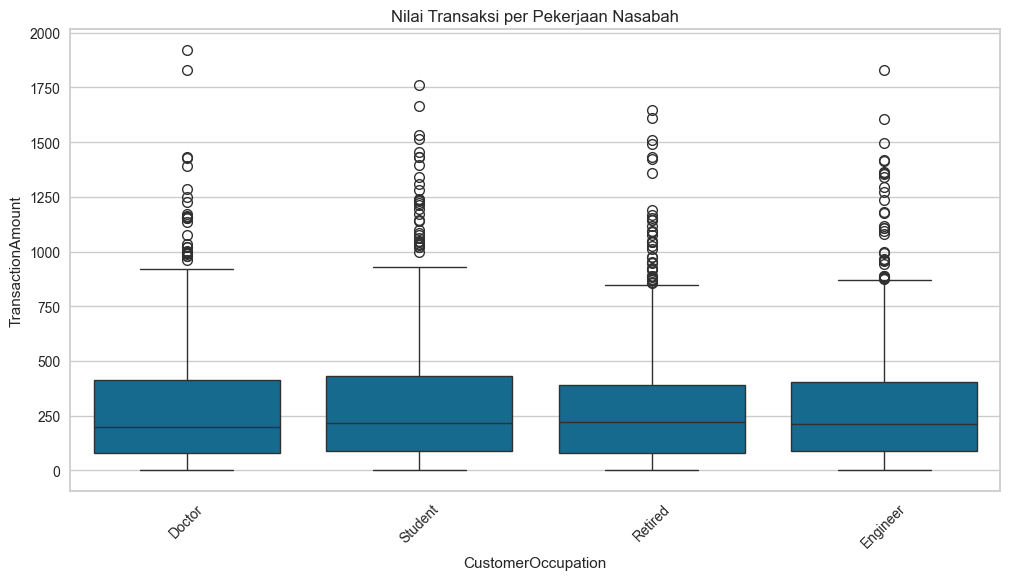

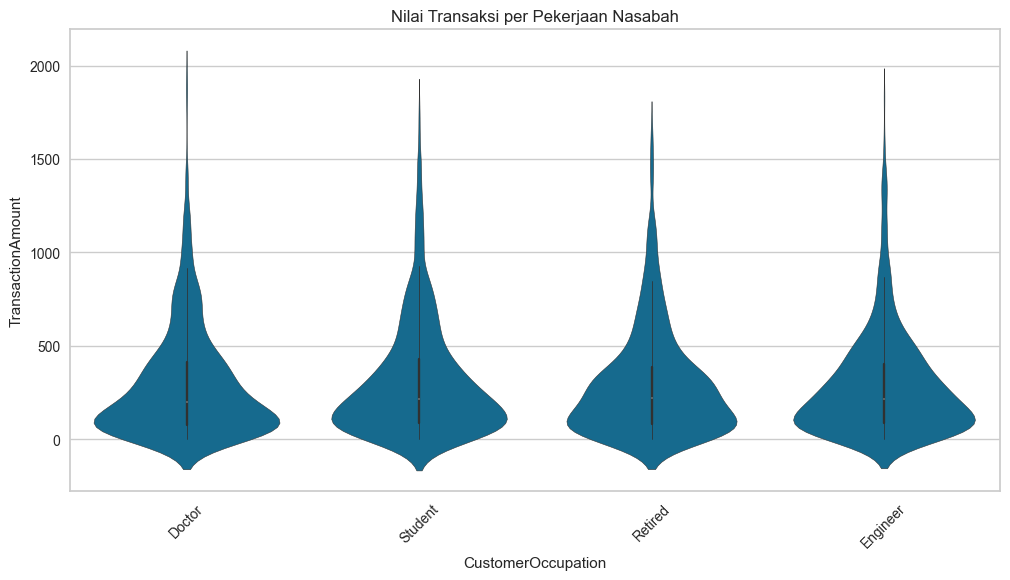

In [8]:
plt.figure(figsize=(12, 6))
# Visualisasi boxplot untuk melihat sebaran outlier
sns.boxplot(x='CustomerOccupation', y='TransactionAmount', data=df)
plt.title("Nilai Transaksi per Pekerjaan Nasabah")
plt.xticks(rotation=45) # Putar label sumbu-x agar tidak tumpang tindih
plt.show()

plt.figure(figsize=(12, 6))
# melihat kepadatan distribusi data di setiap kategori
sns.violinplot(x='CustomerOccupation', y='TransactionAmount', data=df)
plt.title("Nilai Transaksi per Pekerjaan Nasabah")
plt.xticks(rotation=45)

plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**


In [9]:
# Mengecek dataset untuk nilai yang hilang
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64

In [10]:
# Mengecek dataset untuk duplikasi
df.duplicated().sum()

21

In [11]:
# Menangani data yang hilang
# Menghapus baris yang hilang dan pastikan agar perubahan disimpan kembali ke 'df'
df.dropna(inplace=True)

df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
PreviousTransactionDate    0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
TransactionDate            0
dtype: int64

In [12]:
# Menghapus data duplikat
# Menghapus baris duplikat dan pastikan agar perubahan disimpan kembali ke 'df'
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

In [13]:
# Melakukan drop pada kolom yang memiliki keterangan Date, id, dan IP Address
cols_to_drop = [col for col in df.columns if
                'id' in col.lower() or
                'ip' in col.lower() or
                'date' in col.lower()]

df = df.drop(columns=cols_to_drop)

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68


In [14]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal
# Pilih semua kolom yang bertipe 'object' (kategorikal)
categorical_cols = list(df.select_dtypes(include=['object']).columns)

encoders = {}

# Loop melalui setiap kolom kategorikal
for column in categorical_cols:
    # Buat objek LabelEncoder
    label_encoder = LabelEncoder()

    # Terapkan (fit) encoder ke data dan sekaligus ubah (transform) data tersebut
    df[column] = label_encoder.fit_transform(df[column])

    # Simpan encoder
    encoders[column] = label_encoder

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68


In [15]:
# Last checking menggunakan columns.tolist() untuk checking seluruh fitur yang ada
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

## Pembersihan dan Pra Pemrosesan Data

In [16]:
# Melakukan Handling Outlier Data menggunakan metode drop

for col in numerical_cols:

    # Hitung Kuartil 1 (Q1) dan Kuartil 3 (Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Hitung Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Tentukan batas bawah (lower bound) dan batas atas (upper bound)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data untuk menghapus outlier
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.0,1945.000000
mean,256.838278,0.771722,21.299743,0.977378,44.693059,1.503342,119.225193,1.0,5100.811913
std,218.370197,0.419830,12.329250,0.804119,17.743453,1.135888,70.600647,0.0,3907.153333
min,0.260000,0.000000,0.000000,0.000000,18.000000,0.000000,10.000000,1.0,102.200000
25%,78.920000,1.000000,11.000000,0.000000,27.000000,0.000000,63.000000,1.0,1488.650000
50%,199.700000,1.000000,21.000000,1.000000,45.000000,1.000000,111.000000,1.0,4693.600000
75%,374.500000,1.000000,32.000000,2.000000,59.000000,3.000000,162.000000,1.0,7659.990000
max,903.190000,1.000000,42.000000,2.000000,80.000000,3.000000,300.000000,1.0,14977.990000


In [17]:
# Melakukan feature scaling menggunakan StandardScaler() untuk fitur numerik
scaler = StandardScaler()

# Terapkan (fit) scaler ke data dan sekaligus ubah (transform) data tersebut
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726


## **Binning Data**

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik
# Encode hasil binning tersebut menggunakan LabelEncoder

# Tentukan kolom numerik yang ingin Anda kelompokkan
col_to_bin = 'CustomerAge'  # (Isi dengan 'CustomerAge' atau kolom numerik lain)

# Tentukan nama untuk kolom kategori baru
new_col_name = 'AgeGroup'

# Tentukan label untuk 3 grup
bin_labels = ['Muda', 'Dewasa', 'Tua']
# Gunakan 'pd.qcut' untuk membagi data menjadi 3 kelompok
df[new_col_name] = pd.qcut(df[col_to_bin], q=3, labels=bin_labels, duplicates='drop')

# Lakukan Encoding pada kolom baru agar menjadi numerik
label_encoder = LabelEncoder()
df[new_col_name] = label_encoder.fit_transform(df[new_col_name])

# Simpan encoder dan tambahkan nama kolom baru ke 'categorical_cols'
encoders[new_col_name] = label_encoder
categorical_cols.extend([new_col_name])

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918,2
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531,2
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513,1
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895,1
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726,1


# **4. Membangun Model Clustering**

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Buat salinan (copy) dari 'df' ke variabel 'df_used'
df_used = df.copy()

df_used.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup
count,1.945000e+03,1945.000000,1945.000000,1945.000000,1.945000e+03,1945.000000,1.945000e+03,1945.0,1.945000e+03,1945.000000
mean,-8.402305e-17,0.771722,21.299743,0.977378,-1.269479e-16,1.503342,2.557223e-17,0.0,-6.027740e-17,0.998972
std,1.000257e+00,0.419830,12.329250,0.804119,1.000257e+00,1.135888,1.000257e+00,0.0,1.000257e+00,0.810171
min,-1.175271e+00,0.000000,0.000000,0.000000,-1.504776e+00,0.000000,-1.547483e+00,0.0,-1.279678e+00,0.000000
25%,-8.149648e-01,1.000000,11.000000,0.000000,-9.974163e-01,0.000000,-7.965883e-01,0.0,-9.247374e-01,0.000000
50%,-2.617251e-01,1.000000,21.000000,1.000000,1.730327e-02,1.000000,-1.165330e-01,0.0,-1.042490e-01,1.000000
75%,5.389562e-01,1.000000,32.000000,2.000000,8.065296e-01,3.000000,6.060257e-01,0.0,6.551666e-01,2.000000
max,2.960651e+00,1.000000,42.000000,2.000000,1.990369e+00,3.000000,2.561185e+00,0.0,2.528623e+00,2.000000


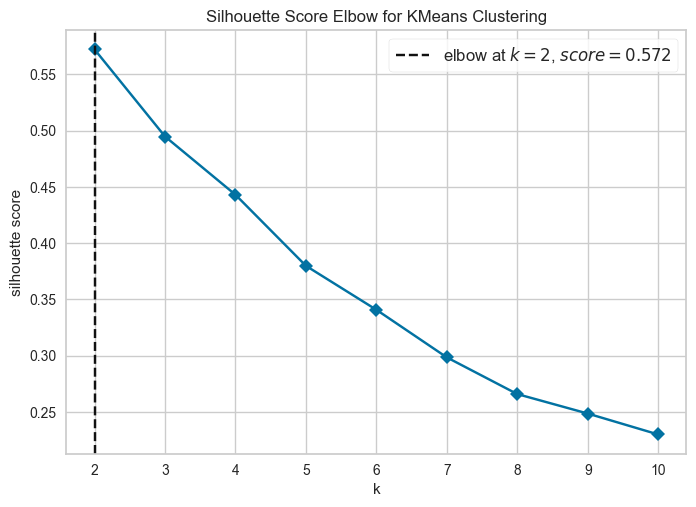

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Buat model clustering
model = KMeans()

# menggunakan KElbowVisualizer untuk menemukan jumlah cluster optimal
visualizer = KElbowVisualizer(model,
                       cluster=(2,10),
                       metric='silhouette',
                       timings=False)

# Jalankan (fit) visualizer pada data
visualizer.fit(df)
# Tampilkan plot
visualizer.show()

In [21]:
# Menggunakan algoritma K-Means Clustering

# Buat objek model KMeans
model = KMeans(n_clusters=2, random_state=42)

# Latih (fit) model dengan data Anda (df)
model.fit(df)

KMeans(n_clusters=2, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
# Simpan model clustering yang sudah dilatih
joblib.dump(model, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.

# Dapatkan hasil (label) cluster dari model 'kmeans' yang telah di-fit
labels = model.labels_

# Panggil fungsi untuk menghitung silhouette score
score = silhouette_score(df, labels)

# Cetak skornya
print("Silhouette Score:", score)

Silhouette Score: 0.5719840690144938


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


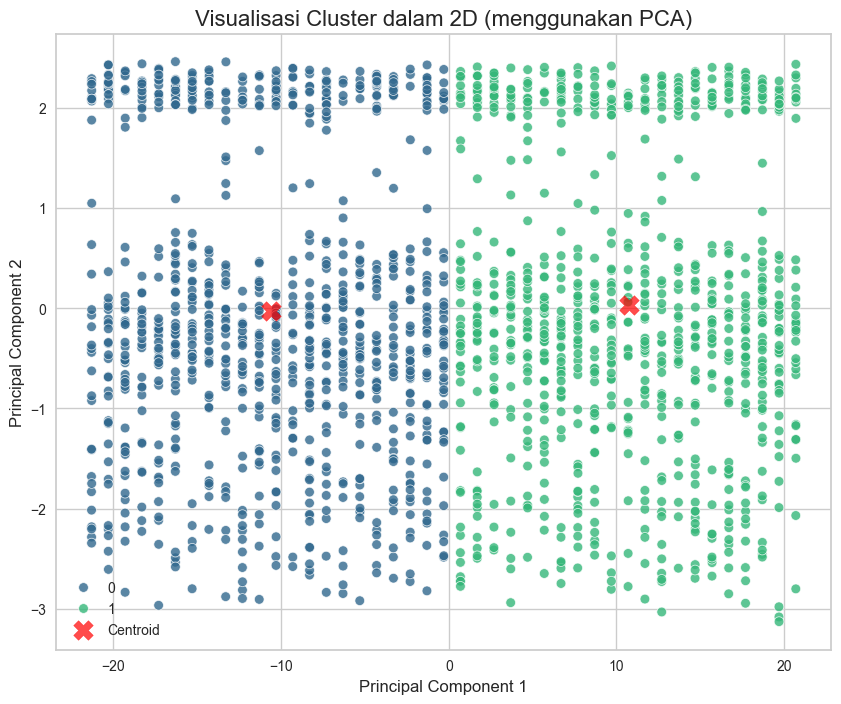

In [24]:
# Membuat visualisasi hasil clustering

# Buat objek PCA untuk 2 komponen
pca = PCA(n_components=2)

# Terapkan (fit) PCA ke data 'df' dan transformasikan data tersebut
df_pca = pca.fit_transform(df)

# Buat DataFrame baru 'df_pca' dari hasil transformasi
df_pca = pd.DataFrame(data=df_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Tambahkan kolom 'Cluster' ke 'df_pca' menggunakan 'labels'(variabel dari hasil 'kmeans.labels_' sebelumnya)
df_pca['Cluster'] = labels

# Buat scatter plot menggunakan Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',  # Warnai titik berdasarkan kolom 'Cluster'
    palette=sns.color_palette("viridis", n_colors=2),
    data=df_pca,
    legend="full",
    alpha=0.8
)

plt.title('Visualisasi Cluster dalam 2D (menggunakan PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
centers = pca.transform(model.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Centroid')
plt.legend()
plt.show()

In [25]:
# Membangun model menggunakan PCA.

pca = PCA(n_components=2)

# Terapkan (fit) PCA ke data 'df_used' dan transformasikan data tersebut
df_pca_array = pca.fit_transform(df_used)

# Buat DataFrame baru 'data_final' dari hasil array PCA
data_final = pd.DataFrame(data=df_pca_array, columns=['PCA1', 'PCA2'])

# Buat model KMeans BARU
kmeans_pca = KMeans(n_clusters=2, random_state=42)

# Latih (fit) model KMeans BARU ini HANYA pada 'data_final'
kmeans_pca.fit(data_final)

KMeans(n_clusters=2, random_state=42)

In [26]:
# Simpan model PCA sebagai perbandingan dengan model clustering sebelumnya
joblib.dump(model, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

### **Interpretasi Hasil Clustering**

In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.

# Tambahkan kolom 'Cluster' baru berupa 'labels' (variabel dari 'kmeans.labels_' sebelumnya)
df_used['Cluster'] = labels

# Kelompokkan (groupby) 'df_used' berdasarkan 'Cluster' dan hitung agregasi untuk 'numerical_cols'.
agg_summary = df_used.groupby('Cluster')[numerical_cols].agg(['mean', 'min', 'max']).round(2).T

display(agg_summary)

Cluster                      0     1
TransactionAmount   mean -0.01  0.01
                    min  -1.17 -1.18
                    max   2.96  2.90
CustomerAge         mean  0.02 -0.02
                    min  -1.50 -1.50
                    max   1.99  1.99
TransactionDuration mean  0.03 -0.03
                    min  -1.55 -1.55
                    max   2.56  2.55
LoginAttempts       mean  0.00  0.00
                    min   0.00  0.00
                    max   0.00  0.00
AccountBalance      mean  0.01 -0.01
                    min  -1.28 -1.28
                    max   2.52  2.53

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya sebelum **Inverse** (masih dalam kondisi **Scaled**).
1. **CLUSTER 1: (Pelanggan Loyal dengan Saldo Menengah)**:
    - **Rata-rata (mean) TransactionAmount:** 0.01
    - **Rata-rata (mean) CustomerAge:** -0.02
    - **Rata-rata (mean) AccountBalance:** -0.01
    - **Analisis:** Cluster ini merepresentasikan segmen nasabah usia menengah yang memiliki fondasi simpanan cukup kuat, namun cenderung lebih berhati-hati dalam melakukan transaksi harian. Pola ini mengindikasikan mereka adalah tipe penabung pasif. Oleh karena itu, rekomendasi yang tepat adalah melakukan cross-selling product simpanan berjangka (deposito) atau mendorong peningkatan frekuensi transaksi melalui promo cashback atau diskon merchant.

2. **Cluster 0: (Pelanggan Potensial dengan Saldo Tinggi)**:
    - **Rata-rata (mean) TransactionAmount:** -0.01
    - **Rata-rata (mean) CustomerAge:** 0.02
    - **Rata-rata (mean) AccountBalance:** 0.01
    - **Analisis:** Cluster ini didominasi oleh nasabah usia menengah yang menunjukkan rata-rata aktivitas transaksi rutin dengan nilai yang terjaga. Mereka mencerminkan profil nasabah yang loyal dan mapan secara ekonomi. Sehingga, strategi utama untuk kelompok ini adalah retensi (menjaga hubungan) pelanggan, misalnya dengan menawarkan layanan prioritas (membersip exclusive) atau reward loyalitas untuk menjaga kepuasan mereka agar tidak berpindah ke kompetitor.

# **6. Mengeksport Data**

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_used.rename(columns={"Cluster": "Target"}, inplace=True)
df_used.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Target
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918,2,1
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531,2,0
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513,1,1
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895,1,1
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726,1,1


In [29]:
# Simpan Data
df_used.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal
df_inverse = df_used.copy()

# Gunakan 'scaler' untuk mengembalikan 'numerical_cols' ke nilai aslinya.
df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])

# Tampilkan 5 baris pertama untuk memverifikasi hasilnya
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,2,1
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,2,0
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,1,1
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,1,1
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68,1,1


In [31]:
# inverse dataset yang sudah diencode ke kategori aslinya.

for column in categorical_cols:
    # Ambil encoder yang tepat untuk 'column' dari dictionary 'encoders'
    encoder = encoders[column]

    # Gunakan scaler untuk mengembalikan (inverse) kolom tersebut
    df_inverse[column] = encoder.inverse_transform(df_inverse[column].astype(int))

df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Tua,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Tua,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Muda,1
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Muda,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,Muda,1


In [32]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal

# Kelompokkan (groupby) 'df_inverse' berdasarkan 'Target' dan hitung agregasi untuk 'numerical_cols'.
agg_summary_num = df_inverse.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max']).round(2).T

# Kelompokkan (groupby) 'df_inverse' berdasarkan 'Target' dan hitung agregasi untuk 'categorical_cols'.
agg_summary_cat = df_inverse.groupby('Target')[categorical_cols].agg(lambda x: x.mode()[0]).round(2).T

# Tampilkan kedua hasil ringkasan
display(agg_summary_num)
display(agg_summary_cat)

Target                           0         1
TransactionAmount   mean    255.55    258.15
                    min       0.32      0.26
                    max     903.19    889.01
CustomerAge         mean     45.06     44.33
                    min      18.00     18.00
                    max      80.00     80.00
TransactionDuration mean    121.12    117.30
                    min      10.00     10.00
                    max     300.00    299.00
LoginAttempts       mean      1.00      1.00
                    min       1.00      1.00
                    max       1.00      1.00
AccountBalance      mean   5142.17   5058.81
                    min     117.98    102.20
                    max   14942.78  14977.99

Target,0,1
TransactionType,Debit,Debit
Location,Charlotte,Tucson
Channel,Branch,Branch
CustomerOccupation,Doctor,Student
AgeGroup,Dewasa,Muda


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah **Inverse**.
1. **Cluster 1: (Nasabah Aktif Usia Produktif)**:
    - **Rata-rata (mean) TransactionAmount:** 258.15
    - **Rata-rata (mean) CustomerAge:** 44.33
    - **Rata-rata (mean) AccountBalance:** 5058.81
    - **Analisis:** Kelompok ini adalah nasabah usia produktif (menengah) yang paling rajin bertransaksi (nilai tinggi) dengan saldo yagn moderat. Profil ini menunjukkan gaya hidup dinamis dan lancar dalam perputaran uang. **Rekomendasi:** Tawarkan fitur kemudahan pembayaran, kartu kredit, atau reward points

2. **Cluster 0: (Nasabah Penabung Usia Produktif)**:
    - **Rata-rata (mean) TransactionAmount:** 255.55
    - **Rata-rata (mean) CustomerAge:** 45.06
    - **Rata-rata (mean) AccountBalance:** 5142.17
    - **Analisis:** Kelompok ini sedikit lebih tua dan memiliki saldo tabungan tertinggi, namun transaksi hariannya justru paling rendah. Ini menandakan mereka tipe penabung yang berhati-hati membelanjakan uang. **Rekomendasi:** Tawarkan produk deposito, tabungan berjangka, atau investasi rendah risiko untuk mengoptimalkan dana mereka yang mengendap

In [33]:
# Periksa kembali data yang telah di-inverse.
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Tua,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Tua,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Muda,1
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Muda,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,Muda,1


In [34]:
# Simpan Data Inverse
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.